In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('datasets/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### preparing dataset

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],
            'columns', inplace= True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
titanic[titanic.isnull().any(axis= 1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [6]:
titanic = titanic.dropna()

In [7]:
titanic.shape

(712, 8)

In [8]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

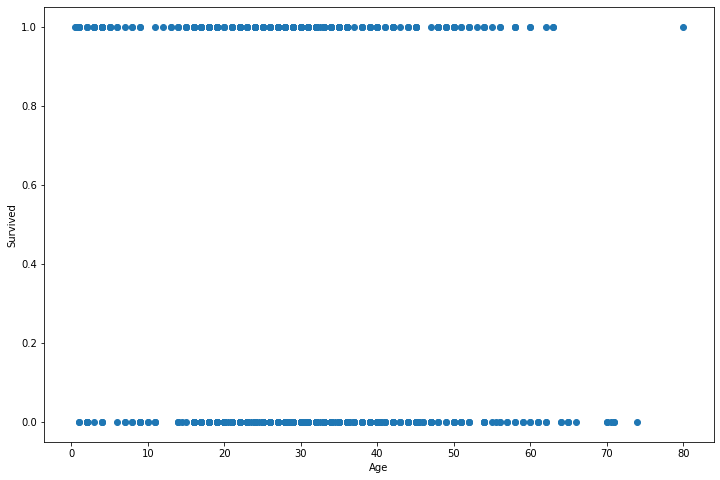

In [9]:
fig, ax = plt.subplots(figsize= (12,8))

plt.scatter(titanic['Age'], titanic['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

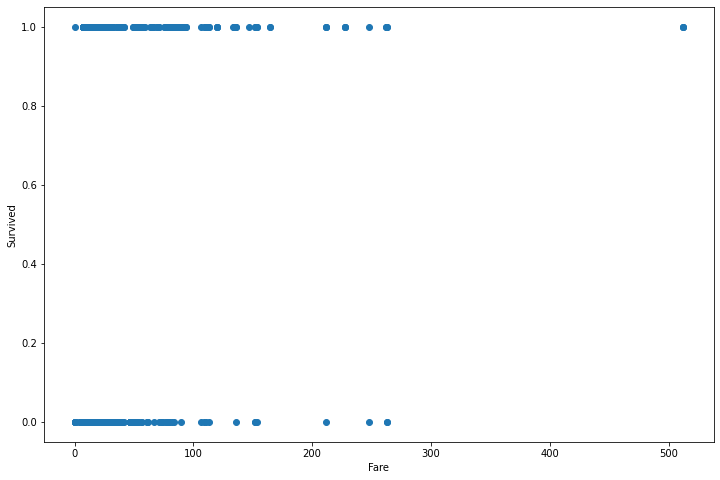

In [10]:
fig, ax = plt.subplots(figsize= (12,8))

plt.scatter(titanic['Fare'], titanic['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [11]:
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [12]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [13]:
titanic_corr = titanic.corr()
titanic_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


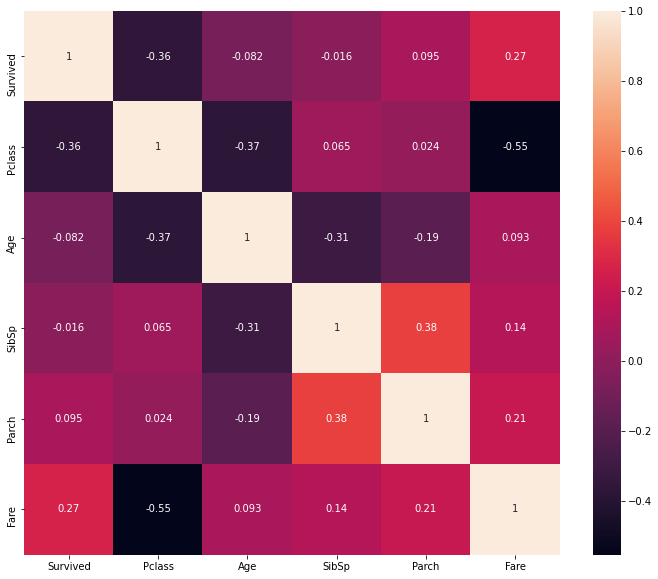

In [14]:
fig, ax = plt.subplots(figsize= (12,10))
sns.heatmap(titanic_corr, annot = True)

In [15]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic['Sex'] = label_encoding.fit_transform(titanic['Sex'].astype(str))
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [16]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [17]:
titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [18]:
#shuffle records

titanic - titanic.sample(frac= 1).reset_index(drop= True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### applying logistic regression

In [19]:
titanic.to_csv('datasets/titanic_processed.csv', index= False)

In [20]:
from sklearn.model_selection import train_test_split

X = titanic.drop('Survived', axis=1)
Y = titanic['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

In [21]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty= 'l2',
                                   C= 1.0,
                                   solver= 'liblinear',
                                   ).fit(x_train, y_train)

In [22]:
y_pred = logistic_model.predict(x_test)

### model check

In [23]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results.head()

,y_test,y_pred
687,0,0
178,0,0
661,0,0
822,0,0
851,0,0


In [24]:
result_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
result_crosstab

y_test,0,1
y_pred,,
0,78,15
1,10,40


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [27]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy score: ", acc)
print("\nprecision score: ", pre)
print("\nrecall score: ", recall)

accuracy score:  0.8251748251748252

precision score:  0.8

recall score:  0.7272727272727273
